# Set up

Python librairies imports :

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import seaborn as sns

%matplotlib inline
sns.set_theme(palette="tab10")

Load pycodestyle (PEP8) :

In [20]:
%load_ext pycodestyle_magic

In [21]:
%pycodestyle_on --max_line_length 125

Mount Google Drive :

In [22]:
work_loc = 'local'  # colab or local

project_path = "My Drive/OPENCLASSROOMS/Projets DATA/5. Segmentation ecommerce"

if (work_loc == 'colab'):
    # Mount Drive folder
    from google.colab import drive
    drive.mount('/content/drive')

    # Google Drive path
    work_path = "/content/drive/"

elif (work_loc == 'local'):
    # Local drive path
    work_path = "/Users/victor/Library/CloudStorage/GoogleDrive-vicozer@gmail.com/"

else:
    raise ValueError("Choose between 'colab' or 'local' work!")

Load data :

In [23]:
# Load customers data
cust_df = pd.read_csv(work_path + project_path + "/project5_customer_cleaned.csv")

# Functions

## Plot functions

In [24]:
# Display countplot
def display_countplot(data, x=None, y=None, title='Countplot', figsize=(12, 8),
                      order=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(data=data, x=x, y=y, order=order)
    plt.show()


# Display histplot
def display_histplot(data, x=None, y=None, title='Histplot', figsize=(12, 8), kde=False):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.histplot(data=data, x=x, y=y, kde=kde)
    plt.show()

# Time periods

I will use the *orders_days_since_last* to compute the last period of time when a customer made an order.

Let's see the days since the last order distribution.

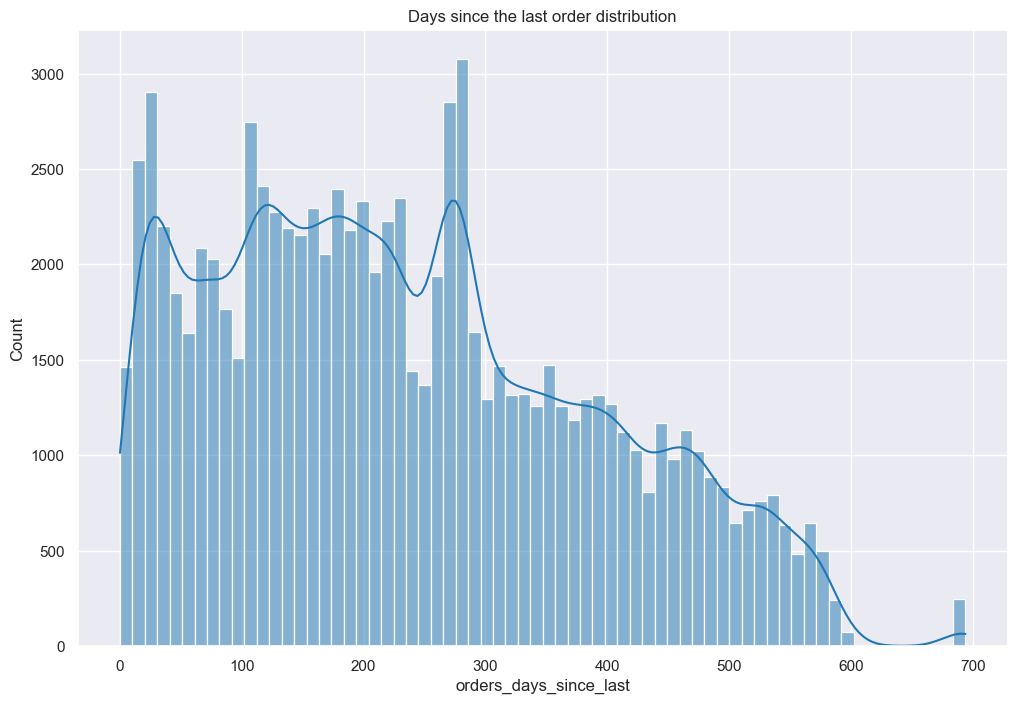

In [25]:
display_histplot(cust_df, x='orders_days_since_last', title="Days since the last order distribution", kde=True)

I see that most of the commands were proceeded before approximately one year (300 days).

I decide to base the study on the last year only.

In [26]:
cust_df = cust_df[cust_df['orders_days_since_last'] < 360]

print(cust_df.shape)

I define the time periods by its number of days.

Then I create new variables to know on which time period the last order was proceeded.

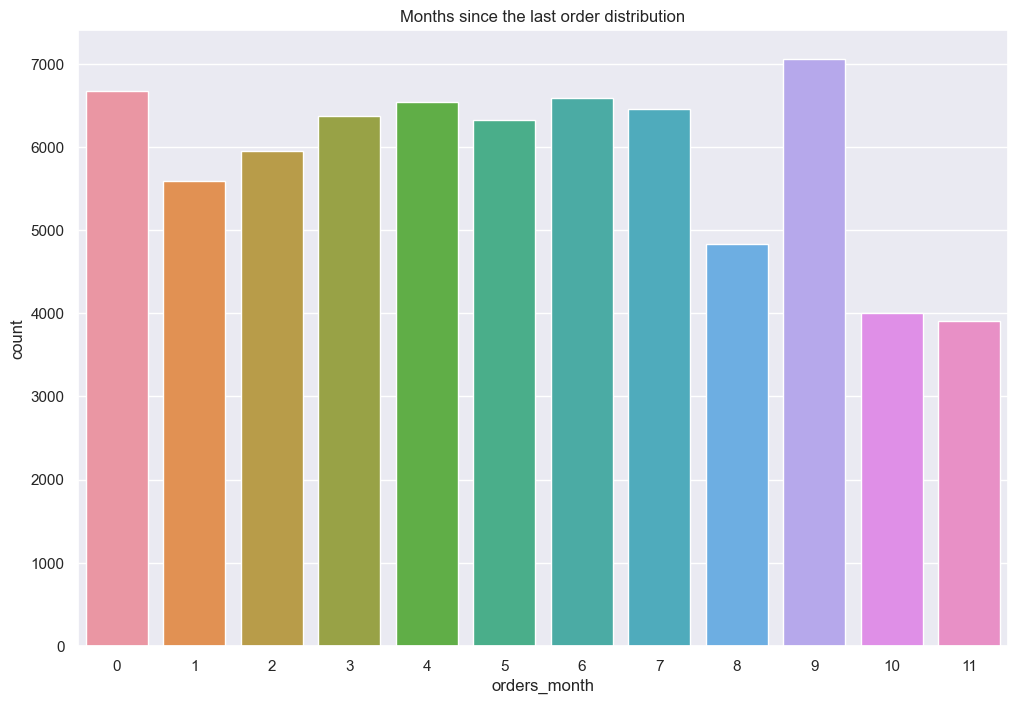

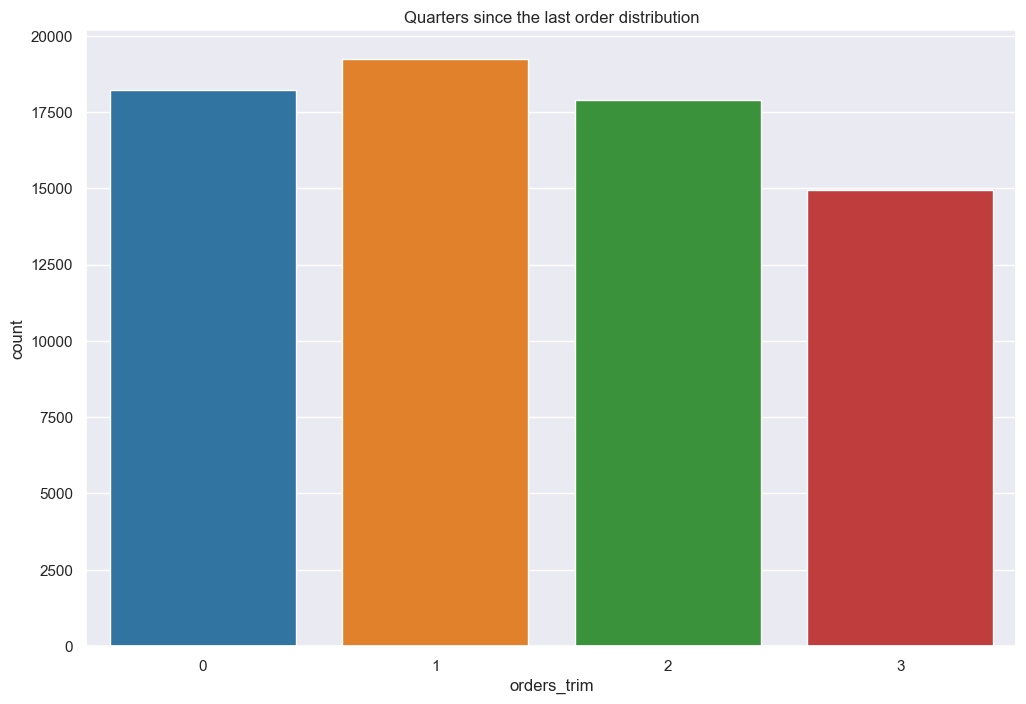

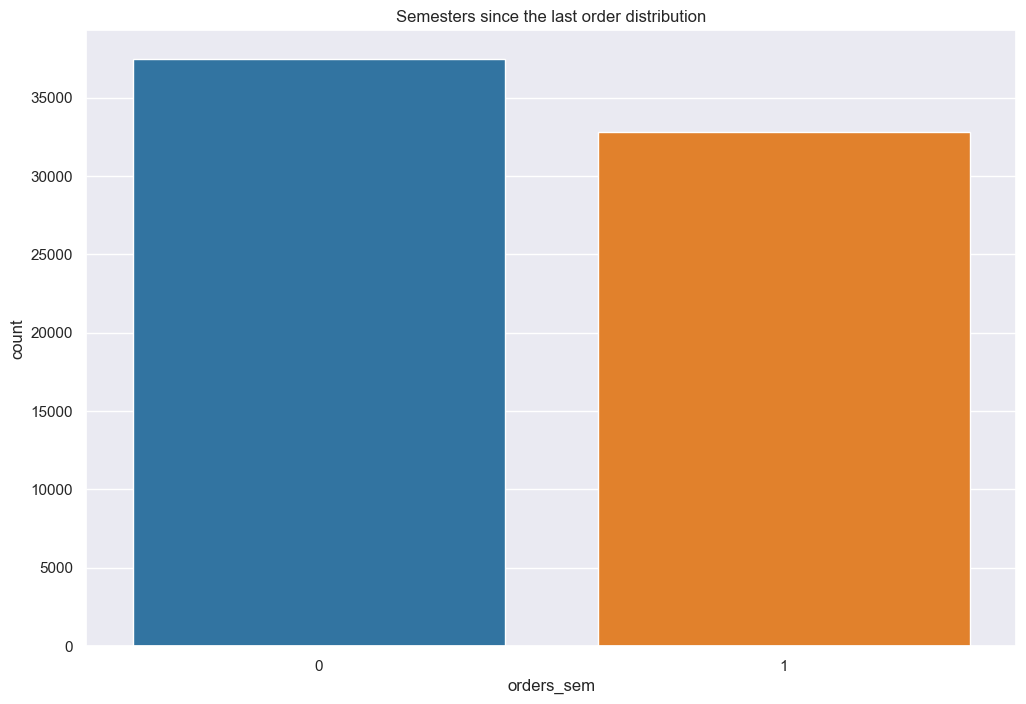

In [27]:
# Create months, quarters and semesters time periods
cust_df['orders_month'] = cust_df['orders_days_since_last'] // 30
cust_df['orders_trim'] = cust_df['orders_days_since_last'] // 90
cust_df['orders_sem'] = cust_df['orders_days_since_last'] // 180

display_countplot(cust_df, x='orders_month', title="Months since the last order distribution")
display_countplot(cust_df, x='orders_trim', title="Quarters since the last order distribution")
display_countplot(cust_df, x='orders_sem', title="Semesters since the last order distribution")

# KMeans model

I use the KMeans model found in the previous notebook and predict the labels on the full dataset

In [28]:
# Prepare the data
x = cust_df.values
x_std = StandardScaler().fit_transform(x)

# Define number of clusters
km_n_clusters = 7

# Apply KMeans algorithm with
km = KMeans(n_clusters=km_n_clusters, random_state=0)
km_labels = km.fit_predict(x_std)

# Add labels to dataframe
cust_df['km_labels'] = km_labels

display(cust_df.head(5).T)

,0,1,3,4,5
orders_number,1.000000,1.000000,1.000000e+00,1.000000,1.000000
orders_days_since_last,111.000000,114.000000,3.200000e+02,287.000000,145.000000
orders_estimated_days_mean,10.000000,7.000000,3.100000e+01,20.000000,13.000000
payments_istlm_mean,8.000000,1.000000,4.000000e+00,6.000000,8.000000
payments_value_mean,2.151982,1.434409,1.639686e+00,2.294224,2.222664
payments_value_std,0.000000,0.000000,0.000000e+00,0.000000,0.000000
payments_value_sum,2.151982,1.434409,1.639686e+00,2.294224,2.222664
payments_by_credit,141.900000,27.190000,4.362000e+01,196.890000,166.980000
payments_by_voucher,0.000000,0.000000,0.000000e+00,0.000000,0.000000
payments_by_boleto,0.000000,0.000000,0.000000e+00,0.000000,0.000000


# Clusters evolution

I decide to check the monthly evolution of the clusters number of individuals.

In [29]:
# Groupby month and labels and compute cumulative sum
df_periods = cust_df.groupby(['orders_month', 'km_labels'])['orders_month'].count().to_frame('count') \
                    .pivot_table('count', ['orders_month'], 'km_labels').fillna(0).cumsum().reset_index()

display(df_periods)

km_labels,orders_month,0,1,2,3,4,5,6
0,0,3124.0,2657.0,486.0,212.0,186.0,10.0,0.0
1,1,5390.0,4973.0,1093.0,434.0,356.0,20.0,0.0
2,2,7542.0,7686.0,1709.0,708.0,544.0,27.0,0.0
3,3,10033.0,10394.0,2310.0,1065.0,749.0,34.0,0.0
4,4,12559.0,13178.0,2979.0,1441.0,924.0,42.0,0.0
5,5,15109.0,15688.0,3647.0,1846.0,1110.0,44.0,0.0
6,6,15157.0,15698.0,4373.0,2422.0,1339.0,48.0,5000.0
7,7,15159.0,15698.0,5035.0,3006.0,1516.0,58.0,10019.0
8,8,15159.0,15698.0,5528.0,3393.0,1643.0,65.0,13840.0
9,9,15159.0,15698.0,6132.0,3995.0,1829.0,71.0,19496.0


Then I display the monthly evolution of the clusters.

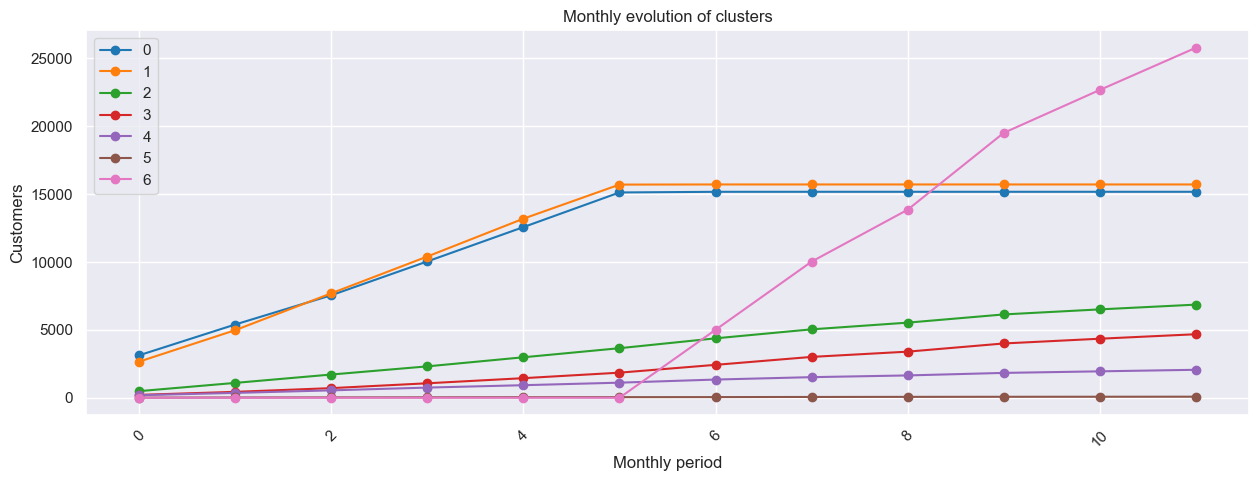

In [30]:
# Display orders month evolution
fig = plt.figure(figsize=(15, 5))
ax = plt.gca()

for col in df_periods.columns:
    if col != 'orders_month':
        ax.plot(df_periods['orders_month'], df_periods[col], marker='o', label=col)

plt.xlabel('Monthly period')
plt.xticks(rotation=45)
plt.ylabel('Customers')
plt.title('Monthly evolution of clusters')
plt.legend()
plt.show()

In [31]:
cust_df = cust_df.drop(columns='km_labels')

# ARI score

I define the period names and fullnames.

In [32]:
# Define period names
periods_name = ['month', 'trim', 'sem']
periods_fullname = ['month', 'quarter', 'semester']

## Period by period

First I try by fitting the model on the period p and compute the ARI score on the period p+1.

In [33]:
periods_ari = []

# Loop over periods type
for period in periods_name:

    # Define column period name
    period_column = "orders_" + period

    # Define array to store ari score
    period_ari = []

    # Loop over periods
    for period_iter in reversed(range(cust_df[period_column].max())):

        # Create features matrix
        x0 = cust_df[cust_df[period_column] == period_iter+1].values
        x1 = cust_df[cust_df[period_column] == period_iter].values

        if x0.size == 0:
            continue
        if x1.size == 0:
            continue

        # Standardize features
        x0_std = StandardScaler().fit_transform(x0)
        x1_std = StandardScaler().fit_transform(x1)

        # Fit model
        km0 = KMeans(n_clusters=km_n_clusters, random_state=0)
        km0_true = km0.fit_predict(x0_std)
        km1 = KMeans(n_clusters=km_n_clusters, random_state=0)
        km1_true = km1.fit_predict(x1_std)

        # Predict
        km1_predict = km0.predict(x1_std)

        # Compute ari score
        period_ari.append(adjusted_rand_score(km1_true, km1_predict))

    # Store ari score
    periods_ari.append(period_ari)

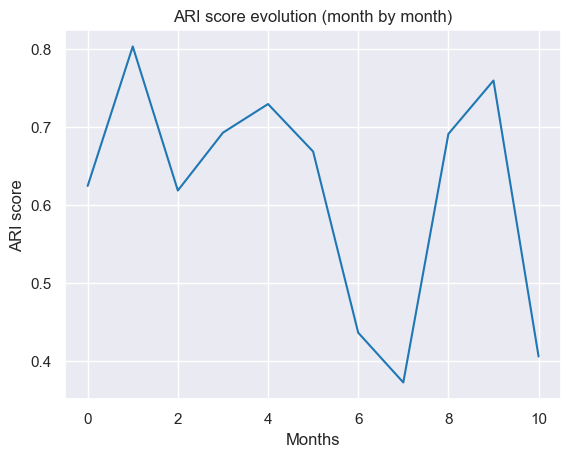

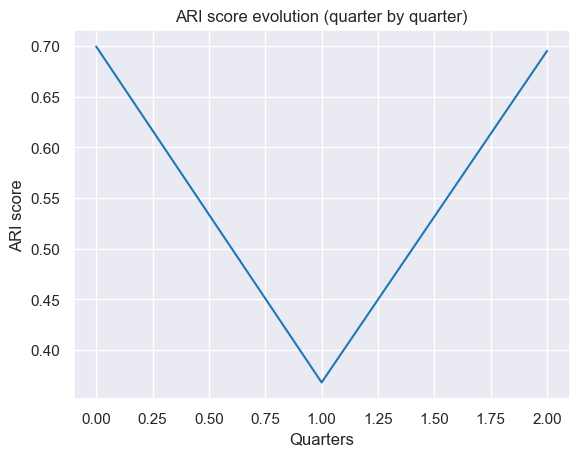

In [34]:
for ari, fullname in zip(periods_ari, periods_fullname):

    # Print mean ari score
    print(fullname.capitalize(), "ARI score mean = ", np.array(ari).mean())

    # Plot ari evolution
    if(len(ari) > 1):
        sns.lineplot(ari)
        plt.title("ARI score evolution (" + fullname + " by " + fullname + ")")
        plt.xlabel(fullname.capitalize() + "s")
        plt.ylabel("ARI score")
        plt.show()

    print("\n")

## First period

I then try a second method where a fit the model on the oldest period and compute the ari score on all the following periods.

In [35]:
periods_ari = []

# Loop over periods type
for period in periods_name:

    # Define column period name
    period_column = "orders_" + period

    # Define array to store ari score
    period_ari = []

    # Get number of periods
    n_periods = cust_df[period_column].max()

    # Create feature matrix of first period
    x0 = cust_df[cust_df[period_column] == n_periods].values

    # Standardize features
    x0_std = StandardScaler().fit_transform(x0)

    # Fit model
    km0 = KMeans(n_clusters=km_n_clusters, random_state=0)
    km0_true = km0.fit_predict(x0_std)

    # Loop over next periods
    for period_iter in reversed(range(n_periods)):

        # Create features matrix
        x1 = cust_df[cust_df[period_column] == period_iter].values

        if x1.size == 0:
            continue

        x1_std = StandardScaler().fit_transform(x1)

        km1 = KMeans(n_clusters=km_n_clusters, random_state=0)
        km1_true = km1.fit_predict(x1_std)

        # Predict
        km1_predict = km0.predict(x1_std)

        # Compute ari score
        period_ari.append(adjusted_rand_score(km1_true, km1_predict))

    # Store ari score
    periods_ari.append(period_ari)

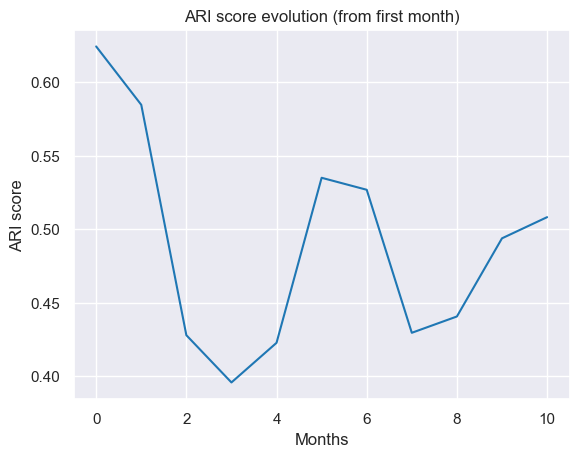

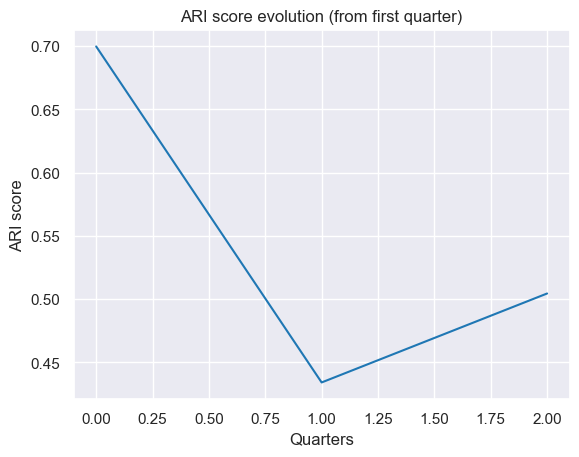

In [36]:
for ari, fullname in zip(periods_ari, periods_fullname):

    if(len(ari) > 1):
        # Print mean ari score
        print(fullname.capitalize(), "ARI score mean = ", np.array(ari).mean())

        # Plot ari evolution
        sns.lineplot(ari)
        plt.title("ARI score evolution (from first " + fullname + ")")
        plt.xlabel(fullname.capitalize() + "s")
        plt.ylabel("ARI score")
        plt.show()

    else:
        # Print mean ari score
        print(fullname.capitalize(), "ARI score = ", ari)

    print("\n")

Conclusion : by the look of the clusters monthly evolution and the ARI score evolutions (second method) the update should be done at least every 5 months.